<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/Google_Colab_Caffe_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install caffe-cpu

Reading package lists... Done
Building dependency tree       
Reading state information... Done
caffe-cpu is already the newest version (1.0.0-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [2]:
!git clone https://github.com/GilLevi/AgeGenderDeepLearning

fatal: destination path 'AgeGenderDeepLearning' already exists and is not an empty directory.


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


caffe_root = './caffe/' 
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [0]:
mean_filename='./AgeGenderDeepLearning/models/mean.binaryproto' # 変更箇所
proto_data = open(mean_filename, "rb").read()
a = caffe.io.caffe_pb2.BlobProto.FromString(proto_data)
mean  = caffe.io.blobproto_to_array(a)[0]

In [0]:
age_net_pretrained='./AgeGenderDeepLearning/models/age_net.caffemodel' # 変更箇所
age_net_model_file='./AgeGenderDeepLearning/age_net_definitions/deploy.prototxt' # 変更箇所
age_net = caffe.Classifier(age_net_model_file, age_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [0]:
gender_net_pretrained='./AgeGenderDeepLearning/models/gender_net.caffemodel'
gender_net_model_file='./AgeGenderDeepLearning/gender_net_definitions/deploy.prototxt'
gender_net = caffe.Classifier(gender_net_model_file, gender_net_pretrained,
                       mean=mean,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(256, 256))

In [0]:
age_list=['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']
gender_list=['Male','Female']

In [8]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 
# ウェブ上のリソースを指定する
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Gisele_B_edit.jpg/300px-Gisele_B_edit.jpg'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'model1.jpg') 

('model1.jpg', <http.client.HTTPMessage at 0x7f7d928eea58>)

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


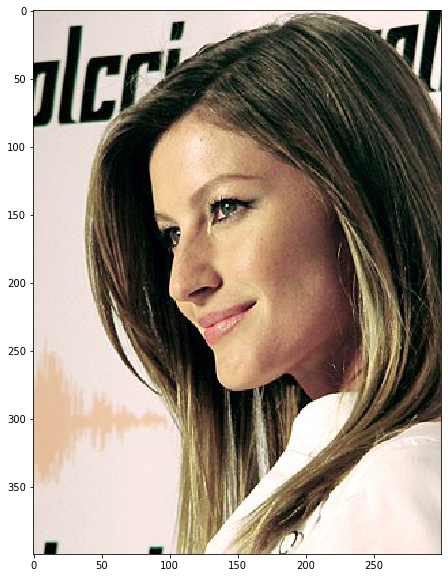

In [9]:
example_image = 'model1.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [10]:
prediction = age_net.predict([input_image]) 

print ('predicted age:', age_list[prediction[0].argmax()]) 

predicted age: (15, 20)


In [11]:
prediction = gender_net.predict([input_image]) 

print ('predicted gender:', gender_list[prediction[0].argmax()])

predicted gender: Female


In [12]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 
# ウェブ上のリソースを指定する
url = 'https://upload.wikimedia.org/wikipedia/commons/f/f3/LindaEvangelista.jpg'
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.request.urlretrieve(url, 'model2.jpg') 

('model2.jpg', <http.client.HTTPMessage at 0x7f7d925944a8>)

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


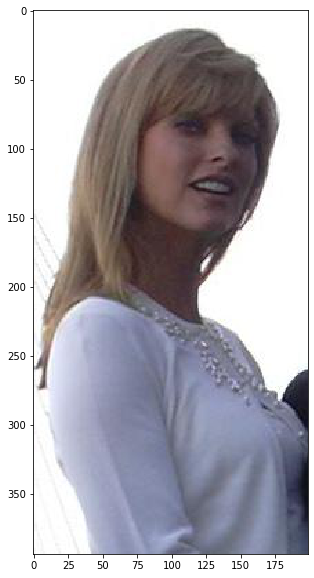

In [13]:
example_image = 'model2.jpg'
input_image = caffe.io.load_image(example_image)
_ = plt.imshow(input_image)

In [14]:
prediction = age_net.predict([input_image]) 

print ('predicted age:', age_list[prediction[0].argmax()]) 

predicted age: (60, 100)


In [15]:
prediction = gender_net.predict([input_image]) 

print ('predicted gender:', gender_list[prediction[0].argmax()])

predicted gender: Male
